In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.abspath('../..'))

from convoQC.utils import UCC_DIR, DATA_DIR, load_data, load_ucc_data

In [2]:
files = os.listdir(UCC_DIR)
files[:10]

['H,0,0,0;H,1.4439,0,0;H,0.4357,0.1785,0;H,0.4484,-0.1386,-0.3345.json',
 'H,0,0,0;H,1.3259,0,0;H,0.6541,-0.0489,0;H,-0.4046,0.2324,-0.4781.json',
 'H,0,0,0;H,0.401,0,0;H,-0.1196,0.9943,0;H,0.0526,0.2628,-0.3113.json',
 'H,0,0,0;H,0.4442,0,0;H,-0.5661,0.2296,0;H,0.456,-0.3737,0.2928.json',
 'H,0,0,0;H,0.8966,0,0;H,0.8805,-0.5917,0;H,0.8831,-0.1491,0.7351.json',
 'H,0,0,0;H,0.5267,0,0;H,-0.5184,-0.6872,0;H,-0.0484,0.4662,0.2597.json',
 'H,0,0,0;H,0.6156,0,0;H,0.015,-0.4982,0;H,-0.8246,-0.7401,0.8133.json',
 'H,0,0,0;H,0.8038,0,0;H,0.4068,0.3944,0;H,0.1906,-0.1551,-1.0294.json',
 'H,0,0,0;H,1.4623,0,0;H,1.0832,0.3915,0;H,0.0604,0.2917,0.5787.json',
 'H,0,0,0;H,0.5564,0,0;H,0.8848,0.8321,0;H,0.1463,0.35,-0.8403.json']

In [3]:
filename = files[0]
filename

'H,0,0,0;H,1.4439,0,0;H,0.4357,0.1785,0;H,0.4484,-0.1386,-0.3345.json'

In [4]:
load_data(filename)

{'geometry': [['H', [0.0, 0.0, 0.0]],
  ['H', [1.4439, 0.0, 0.0]],
  ['H', [0.4357, 0.1785, 0.0]],
  ['H', [0.4484, -0.1386, -0.3345]]],
 'multiplicity': 1,
 'canonical_orbitals': array([[ 0.30426591,  0.74885457,  0.84198626,  1.54699804],
        [-0.01539952, -0.91219068,  0.46062355,  0.63373275],
        [ 0.42558492, -0.119695  ,  0.76285055, -2.13137207],
        [ 0.34401239, -0.19101009, -1.83927106,  0.37847916]]),
 'canonical_to_oao': array([[ 0.55206447,  0.16537835,  0.5966307 ,  0.55848602],
        [ 0.4474048 , -0.88435768, -0.05552521, -0.12106772],
        [ 0.40079765,  0.29456966,  0.30699797, -0.8113829 ],
        [ 0.57828627,  0.32216488, -0.73939232,  0.12285671]]),
 'orbital_energies': array([-1.16220876, -0.19990799,  0.66838409,  1.00930131]),
 'exact_energy': -1.321318016705778,
 'ground_states': array([[ 0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j],
        [ 0.00000000e+00+0.j],
        [ 

In [5]:
ucc_dict = load_ucc_data(filename)
ucc_dict

{'params': array([ 1.33488439e-03, -7.12155680e-04,  2.11501935e-03,  1.76359099e-03,
         7.55246698e-04,  1.68128660e-03,  5.50397905e-04,  1.84974494e-03,
        -4.14383518e-03,  9.49382277e-04, -2.91646620e-03,  9.50729721e-04,
         3.10244288e-04, -3.22581900e-03,  5.34607569e-04, -1.94843563e-03,
         3.87398874e-03,  1.23203071e-04, -6.34987836e-04,  1.48903708e-05,
        -4.88505950e-05,  3.03119698e-05, -1.25017190e-05,  4.59097748e-05,
         9.35145660e-04,  6.59045216e-04, -8.05332294e-05,  7.42242001e-05,
        -6.38090924e-05, -8.74512007e-04, -8.73340913e-06,  2.86440457e-03,
        -1.19379886e-05,  7.80377570e-04, -1.71371198e-04, -2.88025510e-06,
        -7.96459679e-04, -8.44786793e-05,  6.27347936e-06,  1.26748974e-04,
         8.92480264e-04,  1.12101456e-05, -1.66909081e-05,  9.01638966e-05,
        -9.27651296e-04, -6.83537947e-05,  4.28307420e-03, -3.96248618e-05,
         3.88898697e-03, -3.90740692e-03, -1.09776809e-05,  4.12713513e-03]),


In [6]:
import cirq
from convoQC.ansatz_functions.ucc_functions import (generate_ucc_amplitudes, 
                                                    generate_ucc_operators)
from convoQC.scripts.optimize_ucc import singlet_hf_generator
from convoQC.ansatz_functions.ucc_functions import generate_circuit_from_pauli_string
from openfermion.transforms import jordan_wigner
from convoQC.ansatz_functions.qubitoperator_to_paulistring_translator import qubitoperator_to_pauli_string

ucc_amplitudes = generate_ucc_amplitudes(4, 8)
ucc_operator = generate_ucc_operators(*ucc_amplitudes)

pstring_list = []
params_for_exponentiation = []
c = cirq.Circuit(singlet_hf_generator(4, 4))
for i, (op, param) in enumerate(zip(ucc_operator, ucc_dict['params'])):
    qop = jordan_wigner(op)
    for ps in qop:
        pstring_list.append(qubitoperator_to_pauli_string(ps, param))

In [7]:
import tensorflow_quantum

In [8]:
exp_circuit = tensorflow_quantum.util.exponential(pstring_list)

In [9]:
len(exp_circuit)

3712

In [29]:
s = cirq.Simulator()
res = s.simulate(c + exp_circuit)
state = res.final_state

In [30]:
state @ load_data(filename)['ground_states'].conj()

array([0.99880072-1.14100419e-08j])

In [16]:
print(exp_circuit[:11].to_text_diagram(transpose=True))

(1, 0)    (1, 1) (1, 2) (1, 3) (1, 4)
│         │      │      │      │
Rx(0.5π)  │      │      │      H
│         │      │      │      │
@─────────┼──────┼──────┼──────X
│         │      │      │      │
│         @──────┼──────┼──────X
│         │      │      │      │
│         │      @──────┼──────X
│         │      │      │      │
│         │      │      @──────X
│         │      │      │      │
│         │      │      │      Rz(0.001π)
│         │      │      │      │
│         │      │      @──────X
│         │      │      │      │
│         │      @──────┼──────X
│         │      │      │      │
│         @──────┼──────┼──────X
│         │      │      │      │
@─────────┼──────┼──────┼──────X
│         │      │      │      │
Rx(-0.5π) │      │      │      H
│         │      │      │      │


In [ ]:
import matplotlib.pyplot as plt

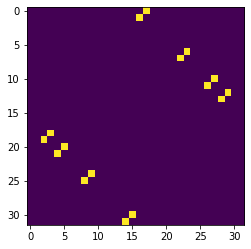

In [28]:
plt.imshow(np.angle(exp_circuit[:11].unitary() + 0.00001))

In [14]:
pstring_list[0]

(0.0013348843874565204+0j)*Y((1, 0))*Z((1, 1))*Z((1, 2))*Z((1, 3))*X((1, 4))

In [57]:
tensor = tensorflow_quantum.convert_to_tensor([c, exp_circuit])

In [50]:
tensor.__dir__()

['__init__',
 '_numpy_internal',
 '_datatype_enum',
 '_shape_tuple',
 '_rank',
 '_copy_to_device',
 '_num_elements',
 '_id',
 'device',
 'backing_device',
 '_handle_data',
 '_tensor_shape',
 '__doc__',
 '__module__',
 '__int__',
 '__long__',
 '__float__',
 '__index__',
 '__bool__',
 '__nonzero__',
 '__format__',
 '__reduce__',
 '__copy__',
 '__deepcopy__',
 '__str__',
 '__repr__',
 '__len__',
 '_numpy',
 'dtype',
 'numpy',
 '_override_operator',
 '_copy_nograd',
 '_copy',
 'shape',
 'get_shape',
 '_shape_as_list',
 'ndim',
 'cpu',
 'gpu',
 'set_shape',
 'op',
 'graph',
 'name',
 'value_index',
 'consumers',
 '_add_consumer',
 '_as_node_def_input',
 '_as_tf_output',
 'eval',
 'OVERLOADABLE_OPERATORS',
 '_USE_EQUALITY',
 '_create_with_tf_output',
 '_c_api_shape',
 '_shape',
 '_disallow_when_autograph_disabled',
 '_disallow_when_autograph_enabled',
 '_disallow_in_graph_mode',
 '_disallow_bool_casting',
 '_disallow_iteration',
 '__iter__',
 '__hash__',
 '__array_priority__',
 '__array__',


<tf.Tensor: shape=(1,), dtype=string, numpy=
array([b'\n\x0e\n\x0ctfq_gate_set\x12\xc2\xe2\x1f\x08\x01\x12\xb2\x01\nW\n\x04\n\x02HP\x12\x13\n\x08exponent\x12\x07\n\x05\r\x00\x00\x80?\x12\x17\n\x0cglobal_shift\x12\x07\n\x05\r\x00\x00\x00\x00\x12\x1a\n\x0fexponent_scalar\x12\x07\n\x05\r\x00\x00\x80?\x1a\x05\x12\x031_4\nW\n\x04\n\x02XP\x12\x1a\n\x0fexponent_scalar\x12\x07\n\x05\r\x00\x00\x80?\x12\x13\n\x08exponent\x12\x07\n\x05\r\x00\x00\x00?\x12\x17\n\x0cglobal_shift\x12\x07\n\x05\r\x00\x00\x00\xbf\x1a\x05\x12\x031_0\x12a\n_\n\x05\n\x03CNP\x12\x13\n\x08exponent\x12\x07\n\x05\r\x00\x00\x80?\x12\x17\n\x0cglobal_shift\x12\x07\n\x05\r\x00\x00\x00\x00\x12\x1a\n\x0fexponent_scalar\x12\x07\n\x05\r\x00\x00\x80?\x1a\x05\x12\x031_0\x1a\x05\x12\x031_4\x12a\n_\n\x05\n\x03CNP\x12\x17\n\x0cglobal_shift\x12\x07\n\x05\r\x00\x00\x00\x00\x12\x1a\n\x0fexponent_scalar\x12\x07\n\x05\r\x00\x00\x80?\x12\x13\n\x08exponent\x12\x07\n\x05\r\x00\x00\x80?\x1a\x05\x12\x031_1\x1a\x05\x12\x031_4\x12a\n_\n\x05\n\x03CNP\

In [7]:
print(c.to_text_diagram(transpose=True))

(1, 0) (1, 1) (1, 2) (1, 3) (1, 4)         (1, 5)         (1, 6)         (1, 7)
│      │      │      │      │              │              │              │
[Y]────[Z]────[Z]────[Z]────[X]^theta0     │              │              │
│      │      │      │      │              │              │              │
[X]────[Z]────[Z]────[Z]────[Y]^(-theta0)  │              │              │
│      │      │      │      │              │              │              │
[Y]────[Z]────[Z]────[Z]────[Z]────────────[X]^theta1     │              │
│      │      │      │      │              │              │              │
[X]────[Z]────[Z]────[Z]────[Z]────────────[Y]^(-theta1)  │              │
│      │      │      │      │              │              │              │
[Y]────[Z]────[Z]────[Z]────[Z]────────────[Z]────────────[X]^theta2     │
│      │      │      │      │              │              │              │
[X]────[Z]────[Z]────[Z]────[Z]────────────[Z]────────────[Y]^(-theta2)  │
│      │      │     

In [8]:
import tensorflow_quantum

In [9]:
param_dict = {}
for i, v in enumerate(load_ucc_data(filename)['params']):
    param_dict.update({f'theta{i}':v})
param_dict

{'theta0': 0.0013348843874565204,
 'theta1': -0.0007121556801693471,
 'theta2': 0.0021150193513611304,
 'theta3': 0.001763590987407867,
 'theta4': 0.0007552466983104601,
 'theta5': 0.0016812865977803675,
 'theta6': 0.0005503979054111893,
 'theta7': 0.0018497449440927332,
 'theta8': -0.004143835183750753,
 'theta9': 0.0009493822768086605,
 'theta10': -0.0029164661990354257,
 'theta11': 0.0009507297207822176,
 'theta12': 0.00031024428831411633,
 'theta13': -0.0032258190042302663,
 'theta14': 0.0005346075685483208,
 'theta15': -0.001948435634413841,
 'theta16': 0.0038739887446342207,
 'theta17': 0.00012320307089698732,
 'theta18': -0.0006349878363267684,
 'theta19': 1.4890370846564301e-05,
 'theta20': -4.885059495358739e-05,
 'theta21': 3.0311969796695445e-05,
 'theta22': -1.2501718955553624e-05,
 'theta23': 4.590977482128384e-05,
 'theta24': 0.0009351456596819308,
 'theta25': 0.0006590452164709351,
 'theta26': -8.053322941727826e-05,
 'theta27': 7.422420005245229e-05,
 'theta28': -6.3809

In [10]:
resolver = cirq.ParamResolver(param_dict)
resolved_citcuit = cirq.resolve_parameters(c, resolver)

In [11]:
print(resolved_citcuit.to_text_diagram(transpose=True))

(1, 0) (1, 1) (1, 2) (1, 3) (1, 4)       (1, 5)       (1, 6)       (1, 7)
│      │      │      │      │            │            │            │
[Y]────[Z]────[Z]────[Z]────[X]^0.00133  │            │            │
│      │      │      │      │            │            │            │
[X]────[Z]────[Z]────[Z]────[Y]^-0.00133 │            │            │
│      │      │      │      │            │            │            │
[Y]────[Z]────[Z]────[Z]────[Z]──────────[X]^(0)      │            │
│      │      │      │      │            │            │            │
[X]────[Z]────[Z]────[Z]────[Z]──────────[Y]^(0)      │            │
│      │      │      │      │            │            │            │
[Y]────[Z]────[Z]────[Z]────[Z]──────────[Z]──────────[X]^0.00212  │
│      │      │      │      │            │            │            │
[X]────[Z]────[Z]────[Z]────[Z]──────────[Z]──────────[Y]^-0.00212 │
│      │      │      │      │            │            │            │
[Y]────[Z]────[Z]────[Z]────[

In [12]:
tensorflow_quantum.convert_to_tensor([resolved_citcuit])

ValueError: Cannot serialize op cirq.PauliStringPhasor((cirq.Y(cirq.GridQubit(1, 0))*cirq.Z(cirq.GridQubit(1, 1))*cirq.Z(cirq.GridQubit(1, 2))*cirq.Z(cirq.GridQubit(1, 3))*cirq.X(cirq.GridQubit(1, 4))), exponent_neg=0.0013348843874565204, exponent_pos=0) of type <class 'NoneType'>

In [18]:
opt_circuit = cirq.google.optimized_for_xmon(resolved_citcuit)

In [ ]:
print(opt_circuit.to_text_diagram(transpose=True))

In [15]:
len(opt_circuit)

11005

In [19]:
len(opt_circuit)

4959

In [20]:
tensorflow_quantum.convert_to_tensor([opt_circuit])

ValueError: Cannot serialize op cirq.PhasedXZGate(axis_phase_exponent=-0.5, x_exponent=0.5, z_exponent=0.25).on(cirq.GridQubit(1, 0)) of type <class 'cirq.ops.phased_x_z_gate.PhasedXZGate'>

In [21]:
q = cirq.GridQubit.rect(1, 2)
cirq.Circuit([cirq.S(q[0]), cirq.H(q[1]), cirq])

AttributeError: module 'cirq' has no attribute 'GridQubits'

In [22]:
tensorflow_quantum.utils.exponential()

AttributeError: module 'tensorflow_quantum' has no attribute 'utils'